In [11]:
import numpy as np
from matplotlib import rc
import matplotlib.pyplot as plt
from scipy.constants import e, k as kB
rc('font', **{'family': 'serif', 'serif': ['Computer Modern'], 'size': 14})
rc('text', usetex=True)

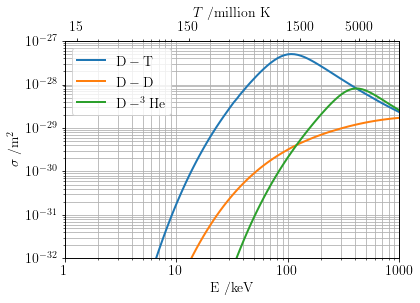

In [12]:
#This was taken from https://scipython.com/blog/plotting-nuclear-fusion-cross-sections/

# To plot using centre-of-mass energies instead of lab-fixed energies, set True
COFM = False

# Reactant masses in atomic mass units (u).
masses = {'D': 2.014, 'T': 3.016, '3He': 3.016}

# Energy grid, 1 – 1000 keV, evenly spaced in log-space.
Egrid = np.logspace(0, 3, 100)

def read_xsec(filename):
    """Read in cross section from filename and interpolate to energy grid."""

    E, xs = np.genfromtxt(filename, comments='#', skip_footer=2, unpack=True)
    if COFM:
        collider, target = filename.split('_')[:2]
        m1, m2 = masses[target], masses[collider]
        E *= m1 / (m1 + m2)

    xs = np.interp(Egrid, E*1.e3, xs*1.e-28)
    return xs

# D + T -> α + n
DT_xs = read_xsec('D_T_-_a_n.txt')

# D + D -> T + p
DDa_xs = read_xsec('D_D_-_T_p.txt')
# D + D -> 3He + n
DDb_xs = read_xsec('D_D_-_3He_n.txt')
# Total D + D fusion cross section is due to equal contributions from the
# above two processes.
DD_xs = DDa_xs + DDb_xs

# D + 3He -> α + p
DHe_xs = read_xsec('D_3He_-_4He_p.txt')

fig, ax = plt.subplots()
ax.loglog(Egrid, DT_xs, lw=2, label='$\mathrm{D-T}$')
ax.loglog(Egrid, DD_xs, lw=2, label='$\mathrm{D-D}$')
ax.loglog(Egrid, DHe_xs, lw=2, label='$\mathrm{D-^3He}$')
ax.grid(True, which='both', ls='-')
ax.set_xlim(1, 1000)
xticks= np.array([1, 10, 100, 1000])
ax.set_xticks(xticks)
ax.set_xticklabels([str(x) for x in xticks])

if COFM:
    xlabel ='E(CofM) /keV'
else:
    xlabel ='E /keV'
ax.set_xlabel(xlabel)

# A second x-axis for energies as temperatures in millions of K
ax2 = ax.twiny()
ax2.set_xscale('log')
ax2.set_xlim(1,1000)
xticks2 = np.array([15, 150, 1500, 5000])
ax2.set_xticks(xticks2 * kB/e * 1.e3)
ax2.set_xticklabels(xticks2)
ax2.set_xlabel('$T$ /million K')

ax.set_ylabel('$\sigma\;/\mathrm{m^2}$')
ax.set_ylim(1.e-32, 1.e-27)

ax.legend()
#plt.savefig('fusion-xsecs.png')
plt.show()